# Regularization

Regularization involves adding a penalty term to our loss function. It turns out that this penalty term can help combat overfitting.


## What we will accomplish

In this notebook we will:
- Introduce the general idea behind regularization,
- Establish regularization as a constrained optimization problem,
- Discuss ridge and lasso regression as particular regularization algorithms and
- Show how lasso is nice for feature selection.

##### Quick Note

This notebook is a little math heavy, I will do my best to provide both mathematical insight for those that want it and give a broad overview for those that do not want to delve too much into the math specifics.

In [1]:
# import the packages we'll use
## For data handling
import pandas as pd
import numpy as np
np.random.seed(440)
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## Coefficient explosions

Let's return to our example from the `Bias-Variance Tradeoff` notebook.

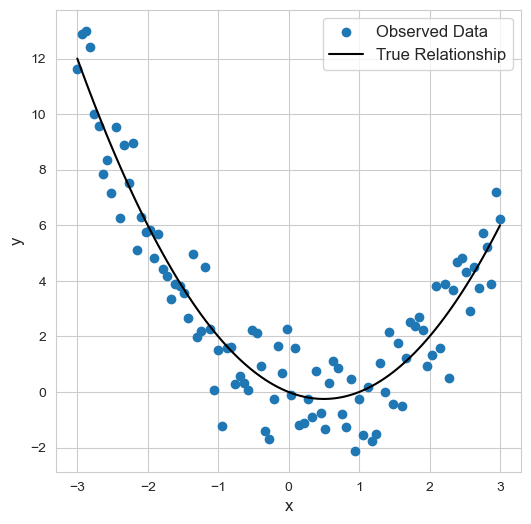

In [2]:
## Generate data
x = np.linspace(-3,3,100)
y = x*(x-1) + 1.2*np.random.randn(100)


## plot the data alongside the true relationship
plt.figure(figsize = (6,6))

plt.scatter(x,y, label="Observed Data")

plt.plot(x,x*(x-1),'k', label="True Relationship")

plt.xlabel("x",fontsize=12)
plt.ylabel("y",fontsize=12)

plt.legend(fontsize=12)

plt.show()

In [3]:
## Import the functions/objects we'll need
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [4]:
## Make an array of zeros that will hold some data for me
n = 26
coef_holder = np.zeros((n,n))

## Now we'll fit the data with polynomials degree 1 through n
for i in range(1,n+1):
    ## Make a pipe
    pipe = Pipeline([('poly',PolynomialFeatures(i,include_bias = False)),
                    ('reg',LinearRegression())])
    
    ## fit the data
    pipe.fit(x.reshape(-1,1),y)
    
    ## store the coefficient estimates
    coef_holder[i-1,:i] = np.round(pipe['reg'].coef_,3)

In [5]:
## Display the coefficient estimates as a dataframe
pd.DataFrame(coef_holder, 
             columns = ["x^" + str(i) for i in range(1,n+1)],
            index = [str(i) + "_deg_poly" for i in range(1,n+1)])

,x^1,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,...,x^17,x^18,x^19,x^20,x^21,x^22,x^23,x^24,x^25,x^26
1_deg_poly,-0.959,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
2_deg_poly,-0.959,1.044,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
3_deg_poly,-0.860,1.044,-0.018,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
4_deg_poly,-0.860,0.925,-0.018,0.015,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
5_deg_poly,-1.053,0.925,0.080,0.015,-0.010,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
6_deg_poly,-1.053,0.865,0.080,0.035,-0.010,-0.002,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
7_deg_poly,-1.020,0.865,0.048,0.035,-0.002,-0.002,-0.001,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
8_deg_poly,-1.020,-0.010,0.048,0.560,-0.002,-0.101,-0.001,0.006,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
9_deg_poly,-0.725,-0.010,-0.425,0.560,0.199,-0.101,-0.032,0.006,0.002,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
10_deg_poly,-0.725,-1.128,-0.425,1.619,0.199,-0.448,-0.032,0.052,0.002,-0.002,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0


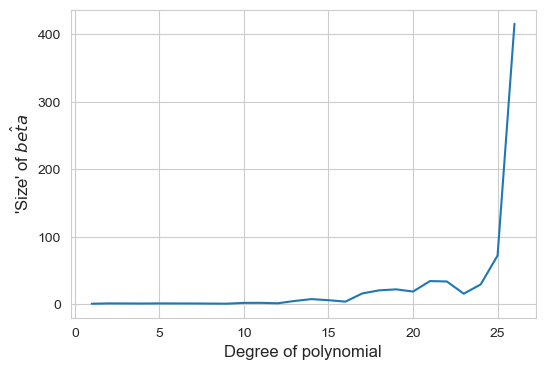

In [6]:
beta_norms = []

for i in range(n):
    beta_norms.append(np.linalg.norm(coef_holder[i,:]))

plt.figure(figsize=(6,4))

plt.plot(range(1,n+1), beta_norms)
plt.ylabel("'Size' of $\hat{beta}$", fontsize=12)
plt.xlabel("Degree of polynomial", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Looking at the dataframe we have just produced we can notice that a number of our coefficients get larger in magnitude as the model gets more complex. 

This observation leads to the main idea behind regularization.

## The idea behind regularization

Suppose the non-intercept coefficients from the regression are denoted by $\beta$, i.e. $\beta=\left(\beta_1,\beta_2,\dots,\beta_m\right)^T$. Recall that in Ordinary Least Squares regression our goal is to estimate $\beta$ so that

$$
MSE = \frac{1}{n}(y - X\beta - \beta_0)^T(y - X\beta - \beta_0)
$$

is minimized on the training data. <i>Note here that I havve separated the intercept $\beta_0$ from the remaining coefficients, so $X$ is not assumed to have a column of $1$s in this notebook.</i>

The main idea behind regularization is to still minimize the MSE, BUT while also ensuring that $\beta$ doesn't get too large. 

#### Norms

We measure how large our vector, $\beta$, is with a <i>vector norm</i>. If you are unfamiliar with what a norm is do not worry we will make this more concrete when we talk about lasso and ridge regression, for now think of it as a measure of how "long" the $\beta$ vector is. We denote a norm like $||\bullet||$, so we would use the notation $||\beta||$ to denote a vector norm of $\beta$.

### Constrained optimization

In regularization we still minimize the MSE, but we constrain ourselves so that we only consider $\beta$ with $||\beta||\leq c$ for some constant $c$. We can think of this as finding the smallest MSE while we are on a $\beta$ budget.

#### An equivalent problem

It turns out this is equivalent to minimizing the following: 

$$
||y-X\beta - \beta_0||^2_2 + \alpha||\beta||,
$$

for some constant $\alpha$ and where $||a||_2^2 = a_1^2 + a_2^2 + \dots + a_n^2, a\in\mathbb{R}^n$. Note that minimizing $||y-X\beta - \beta_0||^2_2$ is equivalent to minimizing the MSE. 

To see a mathematical derivation of this equivalence look at reference 3 below.

Another way we can think of $\alpha||\beta||$ is as a penalty term, which will not allow $\beta$ to grow too large as we minimize $||y-X\beta-\beta_0||^2_2$. The ammount we "penalize" for a large $\beta$ depends on the value of $\alpha$. 

#### Our first hyperparameter

$\alpha$ is the first instance in our notes of a <i>hyperparameter</i>, but it will not be the last. A hyperparameter is a parameter we set before fitting the model. While normal parameters, like $\beta$, are estimated during the training step.

For $\alpha=0$ we recover the OLS estimate for $\beta$, for $\alpha=\infty$ we get $\beta=0$, values of $\alpha$ between those two extremes will give different coefficient estimates. The value of $\alpha$ that gives the best model for your data depends on the problem and can be found through cross-validation model comparisons.

## Specific regularization models

<i>Ridge regression</i> and <i>lasso</i> are two forms of regularization where we make specific choices for the norm.

### Ridge regression

In ridge regression we take $||\bullet||$ to be the square of the Euclidean norm, $||\bullet||_2^2$, i.e. for a vector, $a\in\mathbb{R}^n$, we have:

$$
||a||^2_2 = a_1^2 + a_2^2 + \dots + a_n^2.
$$

### Lasso regression

In lasso regression we take $||\bullet||$ to be the $l_1$-norm, i.e. for $a\in \mathbb{R}^n$ we have:

$$
||a||_1 = |a_1| + |a_2| + \dots + |a_n|.
$$

### Implementing in `sklearn`

We can implement both of these models in `sklearn` with `Ridge` <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html</a> for ridge regression and `Lasso` <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html</a> for lasso regression.

<i>Note: ridge and lasso regression are examples of algorithms/models where scaling the data is a step that should be taken prior to fitting the model. This is because vastly different scales can impact the scales of the components of $\beta$. This can make it so that there is not enough room in the $\beta$-budget to afford the actual values of the individual coefficients.</i>

In [7]:
## Import the models here
## Ridge and Lasso regression are stored in linear_model
from sklearn.linear_model import Ridge, Lasso

In [8]:
## This code will allow us to demonstrate the effect of 
## increasing alpha

## set values for alpha
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]

## The degree of the polynomial we will fit
n=10

#$ These will hold our coefficient estimates
ridge_coefs = np.empty((len(alphas),n))
lasso_coefs = np.empty((len(alphas),n))

## for each alpha value
for i in range(len(alphas)):
    ## set up the ridge pipeline
    ## first scale
    ## then make polynomial features
    ## then fit the ridge regression model
    ## max_iter=5000000
    ridge_pipe = Pipeline([('scale',StandardScaler()),
                              ('poly',PolynomialFeatures(n, interaction_only=False, include_bias=False)),
                              ('ridge',Ridge(alpha=alphas[i], max_iter=5000000))])
    
    ## set up the lasso pipeline
    ## same steps as with ridge
    lasso_pipe = Pipeline([('scale',StandardScaler()),
                              ('poly',PolynomialFeatures(n, interaction_only=False, include_bias=False)),
                              ('lasso',Lasso(alpha=alphas[i], max_iter=5000000))])
    
    
    ## fit the ridge
    ridge_pipe.fit(x.reshape(-1,1), y)
    
    ## fit the lasso
    lasso_pipe.fit(x.reshape(-1,1), y)

    
    # record the coefficients
    ridge_coefs[i,:] = ridge_pipe['ridge'].coef_
    lasso_coefs[i,:] = lasso_pipe['lasso'].coef_

In [9]:
print("Ridge Coefficients")

pd.DataFrame(np.round(ridge_coefs,8),
            columns = ["x^" + str(i) for i in range(1,n+1)],
            index = ["alpha=" + str(a) for a in alphas])

Ridge Coefficients


,x^1,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10
alpha=1e-05,-1.267769,-3.446428,-2.275165,15.148179,3.267643,-12.827441,-1.600771,4.542712,0.248425,-0.569269
alpha=0.0001,-1.269342,-3.402783,-2.268144,15.032270,3.259058,-12.717997,-1.596857,4.500216,0.247829,-0.563473
alpha=0.001,-1.284575,-3.003232,-2.200136,13.971078,3.175876,-11.715957,-1.558922,4.111135,0.242046,-0.510404
alpha=0.01,-1.398782,-0.918769,-1.686519,8.429349,2.545580,-6.481254,-1.270924,2.078280,0.198087,-0.233120
alpha=0.1,-1.644118,1.250544,-0.472656,2.570863,0.995293,-0.918615,-0.546627,-0.085398,0.085946,0.062067
alpha=1,-1.490785,1.493295,-0.227160,1.362737,0.226407,0.294371,-0.080171,-0.531979,0.003806,0.117541
alpha=10,-0.929920,0.947674,-0.398756,0.864838,-0.096839,0.410851,0.084435,-0.234984,-0.014684,0.026117
alpha=100,-0.310084,0.271042,-0.224992,0.322434,-0.180307,0.314653,-0.113684,0.206522,0.048231,-0.085841
alpha=1000,-0.064231,0.063264,-0.066299,0.098824,-0.076673,0.134820,-0.074724,0.140107,0.005207,-0.025196


In [10]:
print("Lasso Coefficients")

pd.DataFrame(np.round(lasso_coefs,8),
            columns = ["x^" + str(i) for i in range(1,n+1)],
            index = ["alpha=" + str(a) for a in alphas])

Lasso Coefficients


,x^1,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10
alpha=1e-05,-1.274155,-3.406114,-2.246200,15.041452,3.231934,-12.726706,-1.584404,4.503580,0.245921,-0.563928
alpha=0.0001,-1.333214,-2.999596,-1.978463,13.964896,2.901937,-11.710571,-1.433171,4.108877,0.222787,-0.510059
alpha=0.001,-1.754981,0.000000,-0.000000,5.752549,0.419806,-3.812091,-0.283009,1.003469,0.045502,-0.082634
alpha=0.01,-1.564623,1.797866,0.000000,1.261740,0.005740,-0.000000,0.000000,-0.315810,-0.005716,0.077904
alpha=0.1,-1.349357,1.152741,-0.000000,0.939831,-0.000000,0.000000,-0.025490,-0.000000,-0.000000,-0.011744
alpha=1,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.496624,-0.102761,0.000000,-0.000000,-0.015817
alpha=10,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.028697,0.043841
alpha=100,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.004852
alpha=1000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000


### Lasso for feature selection

Comparing these two tables we might notice that the coefficients for lasso shrink to 0 quite quickly, while the ridge coefficients tend to hang around and never quite get to $0$. This is one of the benefits of lasso regression, feature selection. The coefficients that tend to stay above $0$ as we increase `alpha` in a lasso regression are typically the "most important" features for minimizing the training MSE. 

#### Why does that happen?

To see a geometric explanation for why this happens let's return to our constrained optimization formulation, and assume both $X$ and $y$ have mean $0$ for simplicity.

##### Ridge Regression
$$
\text{Minimize } || y - X\beta||_2^2 \text{ constrained to } ||\beta||_2^2 \leq c.
$$

If we have two features the constraint is $\beta_1^2 + \beta_2^2 \leq (\sqrt{c})^2$, which you may recall is the formula for a filled in circle centered at the origin with radius $\sqrt{c}$ in $\mathbb{R}^2$.

##### Lasso
$$
\text{Minimize } || y - X\beta||_2^2 \text{ constrained to } ||\beta||_1 \leq c.
$$

If we have two features the constraint is $|\beta_1| + |\beta_2| \leq c$, which gives a filled in square with vertices at $(c,0),(0,c),(-c,0),$ and $(0,-c)$.

Let's look at a picture in the case of two features.

<img src="lecture-5-assets/lasso_ridge_eosl.png" width="55%"></img>

Photo Credit to <a href="https://web.stanford.edu/~hastie/ElemStatLearn/">Elements of Statistical Learning</a>.

In this photo $\hat{\beta}$ is the OLS estimate for $\beta$ at the minimum value of $|| y - X\beta||_2^2$, the red ellipses are selected level curves for $|| y - X\beta||_2^2$, and the blue square and circle are the contraint regions for the lasso and ridge respectively. We can think of lasso and ridge as finding the smallest level curve that still intersects with the constraint region. If the OLS estimate is not contained within the constraint region this will occur somewhere on the boundary. This image demonstrates that the level curve corresponding to the minimal value of $|| y - X\beta||_2^2$ often intercepts the lasso constraint on an axis of the $\beta$-space, which is not the case for ridge regression.

As a reminder for practical purposes decreasing the value of $\alpha$ for the `sklearn` `Lasso` and `Ridge` objects increases the size of the constraint region. Increasing the value of $\alpha$ will shrink the constraint region.

## Which one to use?

Which algorithm is the better choice? Well that depends on the problem. Both are good at addressing overfitting concerns, but each has a couple unique pros and cons.

##### Lasso

<b>Pros</b>

- Works well when you have a large number of features that do not have any effect on the target and
- Feature selection is a plus, this can allow for a sparser model which is good for computational reasons.

<b>Cons</b>

- Can have trouble with highly correlated features (colinearity), it typically chooses one variable among those that are correlated, which may be random.


##### Ridge

<b>Pros</b>

- Works well when the target depends on all or most of the features and
- Can handle colinearity better than lasso.

<b>Cons</b>

- Because ridge typically keeps most of the predictors in the model, this can be a computationally costly model type for data sets with a large number of predictors.


##### Elastic Net

Sometimes the best model will be something in between ridge and lasso. This technique is known as <i>elastic net</i> and will be demonstrated in a `Practice Problems` notebook.

## Notebook specific references

To help teach this lesson I consulted some additional source I found through a Google search. Here are links to those references for you to take a deeper dive into ridge and lasso regression.

1. <a href="https://www.statlearning.com/">https://www.statlearning.com/</a>
2. <a href="https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/">https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/</a>
3. <a href="https://suzyahyah.github.io/optimization/2018/07/20/Constrained-unconstrained-form-Ridge.html">https://suzyahyah.github.io/optimization/2018/07/20/Constrained-unconstrained-form-Ridge.html</a>
4. <a href="https://statweb.stanford.edu/~owen/courses/305a/Rudyregularization.pdf">https://statweb.stanford.edu/~owen/courses/305a/Rudyregularization.pdf</a>
5. <a href="http://web.mit.edu/zoya/www/linearRegression.pdf">http://web.mit.edu/zoya/www/linearRegression.pdf</a>

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)